# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](https://github.com/HelenaGomezV/lab-neural-networks/blob/master/your-code/tttboard.jpg?raw=1)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read tic-tac-toe.csv into a dataframe
df = pd.read_csv('tic-tac-toe.csv')
df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [9]:
df.shape

(958, 10)

In [4]:
# Inspect the dataset. Determine if the dataset is reliable by eyeballing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


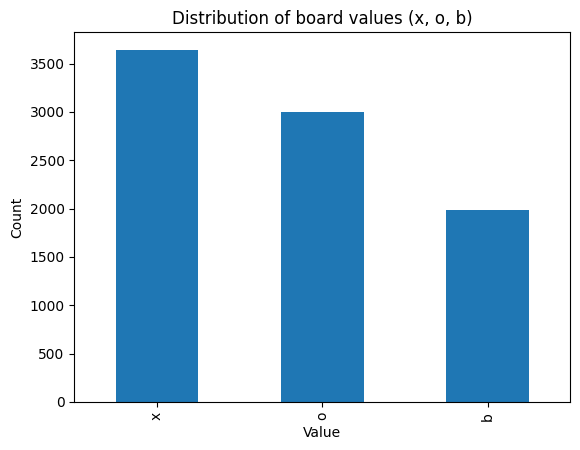

In [10]:
# contar valores en todas las celdas del tablero
value_counts = df[df.columns[:-1]].stack().value_counts()

value_counts.plot(kind='bar')
plt.title("Distribution of board values (x, o, b)")
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()


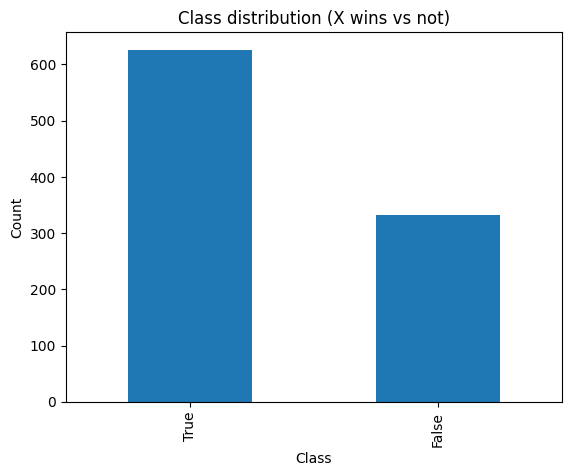

In [11]:
df['class'].value_counts().plot(kind='bar')
plt.title("Class distribution (X wins vs not)")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()


958 rows, 10 columns

9 board-position columns + 1 target (class)

No missing values

Board values are only: x, o, b

Target values are only: True, False

Structure matches the tic-tac-toe problem perfectly

Conclusion:
The dataset is reliable, clean, internally consistent, and suitable for ML.
This is a classic, well-formed dataset with no obvious errors or noise.

In [14]:
# Convert the categorical values to numeric in all columns

# mapping for board values
board_mapping = {'x': 1, 'o': -1, 'b': 0}

# apply mapping to the first 9 columns (board positions)
board_columns = df.columns[:-1]
df[board_columns] = df[board_columns].replace(board_mapping)

# map class column
df['class'] = df['class'].astype(int)

# check result
df.head()

/tmp/ipython-input-1893773233.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[board_columns] = df[board_columns].replace(board_mapping)


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


In [15]:
df.dtypes


,0
TL,int64
TM,int64
TR,int64
ML,int64
MM,int64
MR,int64
BL,int64
BM,int64
BR,int64
class,int64


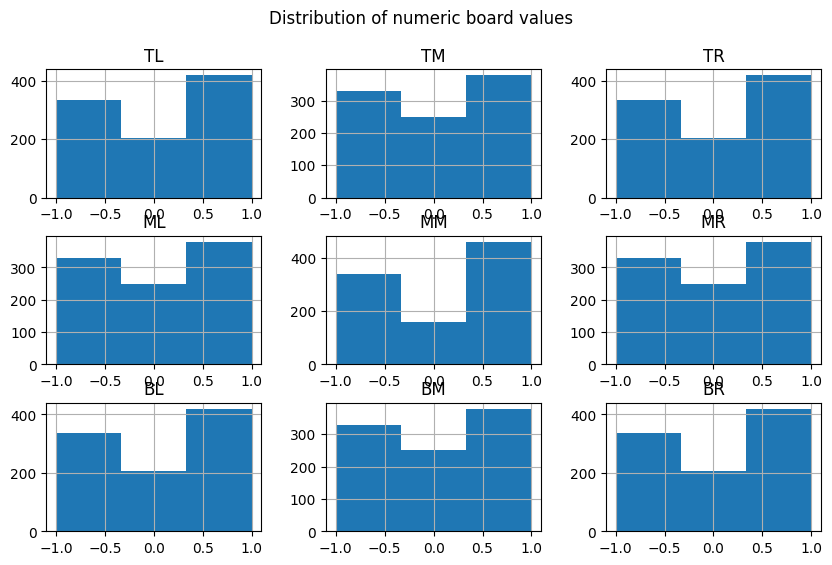

In [16]:
df[board_columns].hist(figsize=(10, 6), bins=3)
plt.suptitle("Distribution of numeric board values")
plt.show()


In [19]:
df[board_columns].stack().unique()


array([ 1, -1,  0])

In [22]:
# Separate the inputs and output.
# Inputs (features)
X = df.drop('class', axis=1)

# Output (target)
y = df['class']

print(X.shape)
print(y.shape)



(958, 9)
(958,)


In [25]:
# Normalize the input data.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Is for normalization
# scaler = StandardScaler() is for standardization
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 1. 1.]]


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [26]:
# your code here
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.optimizers import RMSprop

In [28]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

In [29]:
# Create a Sequential model.
model = Sequential()
model.add(Input(shape=(9,)))  #  define the input shape, 9 input features
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))



model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194 (776.00 B)

 Trainable params: 194 (776.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
batch_size = 32
epochs = 50

In [31]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4040 - loss: 0.7968 - val_accuracy: 0.5104 - val_loss: 0.7156
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5032 - loss: 0.7293 - val_accuracy: 0.6458 - val_loss: 0.6832
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5882 - loss: 0.6921 - val_accuracy: 0.6562 - val_loss: 0.6678
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6084 - loss: 0.6725 - val_accuracy: 0.6458 - val_loss: 0.6550
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6632 - loss: 0.6283 - val_accuracy: 0.6510 - val_loss: 0.6433
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6790 - loss: 0.6287 - val_accuracy: 0.6510 - val_loss: 0.6324
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6478 - loss: 0.6259 - val_accuracy: 0.6510 - val_loss: 0.6229
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6660 - loss: 0.6060 - val_accuracy: 0.6510 - val_los

In [32]:
# Evaluation of the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4993825852870941
Test accuracy: 0.7864583134651184


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [ ]:
# your code here

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# your code here

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here